# **PROJECT** 
#                **BY**
#                 **JUHI SINGH AND KSHITIZ MOHAN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

# **Description**

In [ ]:
# Let's load the dataset and create a copy in case of modification.

data = pd.read_csv('Iris.csv')
df = data.copy()
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# As you can see, there is an extra ID arm, let's remove it from the data set and simplify the data set.

df = df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Exploratory** **Data** **Analysis**

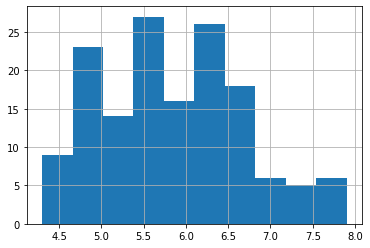

In [ ]:
df['SepalLengthCm'].hist();

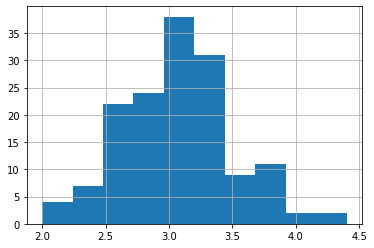

In [ ]:
df['SepalWidthCm'].hist();

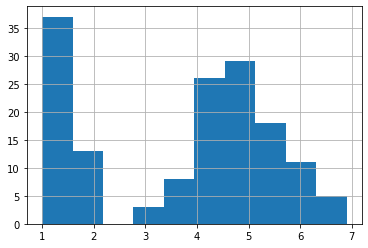

In [ ]:
df['PetalLengthCm'].hist(); 

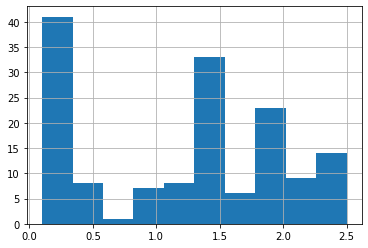

In [ ]:
df['PetalWidthCm'].hist();

In [ ]:
colors = ['red', 'blue', 'yellow']
species = ['Iris-versicolor', 'Iris-virginica', 'Iris-setosa']

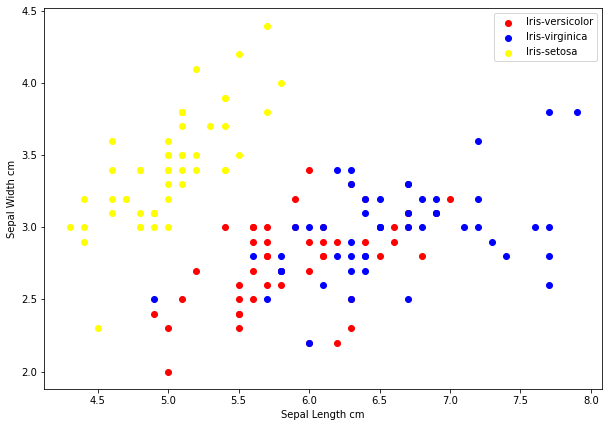

In [ ]:
plt.subplots(figsize= (10,7))

for i in range(3):
    
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c= colors[i], label= species[i])
    
plt.xlabel('Sepal Length cm')
plt.ylabel('Sepal Width cm')
plt.legend();

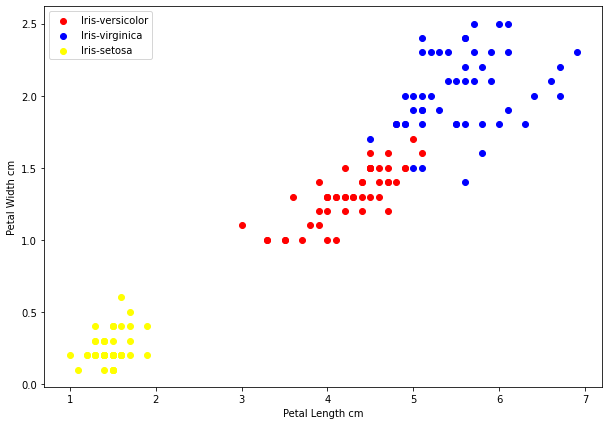

In [ ]:
plt.subplots(figsize= (10,7))

for i in range(3):
    
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c= colors[i], label= species[i])
    
plt.xlabel('Petal Length cm')
plt.ylabel('Petal Width cm')
plt.legend();

# **Correlation Matrix**

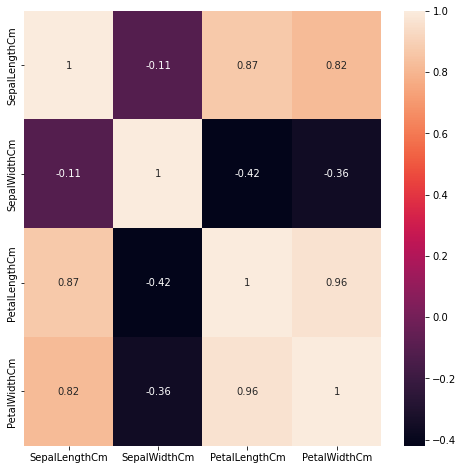

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot= True, ax=ax);

# **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Species'] = le.fit_transform(df['Species'])
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# **Model Training**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X = df.drop(columns= ['Species']) # independent variable
y = df['Species'] # the dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [ ]:
def classify(model, X,y):
    
    model.fit(X_train, y_train)
    print('Accuracy: ', model.score(X_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score: ', np.mean(score))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
classify(model, X, y)

Accuracy:  0.9777777777777777
CV Score:  0.9733333333333334


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier()
classify(model2, X,y)

Accuracy:  0.9777777777777777
CV Score:  0.9733333333333334


In [ ]:
# we find best params for KNN with GridSearchCV

params = { 'n_neighbors' : [4, 5, 8, 10],
           'algorithm' : ['auto', 'ball_tree'],
           'leaf_size' : [10,30,50,100]}

from sklearn.model_selection import GridSearchCV

knn_cv = GridSearchCV(model2, params, cv = 10, n_jobs = -1, verbose = 2)
knn_cv_model = knn_cv.fit(X_train, y_train)
knn_cv_model

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree'],
                         'leaf_size': [10, 30, 50, 100],
                         'n_neighbors': [4, 5, 8, 10]},
             verbose=2)

In [ ]:
knn_cv_model.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4}

# **Accuracy**

In [ ]:
model_knn = KNeighborsClassifier(algorithm='auto', leaf_size= 10, n_neighbors= 4)
model_knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)
print(model_knn.score(X_test, y_test))

0.9777777777777777
